# CAO Points Analysis Using Pandas 

## Fundamentals of Data Analysis Assignment

### Andrew Walker - G00398788@gmit.ie

![https://pandas.pydata.org](https://pandas.pydata.org/docs/_static/pandas.svg)

# 1. Introduction 

This notebook contains an overview of how to load CAO points data from the [CAO Website](https://www.cao.ie/index.php?page=points) into a `pandas` dataframe. 

It also provides a comparison of CAO points in 2019, 2020, and 2020 using the funcitionality in `pandas` and `matplotlib.pyplot`. 

Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive and aims to be the fundamental high-level building block for doing practical, real-world data analysis in Python (https://pandas.pydata.org/docs/getting_started/overview.html).

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python (https://matplotlib.org/stable/index.html) and can be used to create many different types of plot such as scatter plots and histograms. 

# 2. Required Installations

In order to run the notebook successfully, a number of packages or libraries must be installed and initialised.

Python distributions contain commonly used packages and tools. Anaconda works on Windows, Mac, and Linux, provides a large collection of packages(https://scipy.org/install/).

The notebook uses the following packages, which, if not installed on the user's computer might result in the notebook not functioning as intended:

- `regular expressions`
- `requests`
- `datetime`
- `pandas`
- `urllib.request`
- `matplotlib.pyplot`

If required, Python comes with an inbuilt package management system, pip which can install, update, or delete any official package (https://scipy.org/install/).

For example, to install matplotlib.pyplot, if required:

`python -m pip install -U pip`

`python -m pip install -U matplotlib`

Further details are available on the [matplotlib website](https://matplotlib.org/stable/users/installing/index.html).

Once installed, the packages must be imported:

In [51]:
# Regular expressions.
import re

# Convenient HTTP requests.
import requests as rq

# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# For downloading
import urllib.request as urlrq

# matplotlib
import matplotlib.pyplot as plt

# 2. The Assignment

Much of the coding used in this assignment was taken from the lectures by Ian McLoughlin as part of the Fundamentals of Data Analysis course at GMIT which started in September 2021. These lectures provided the main body of coding used to import the data from the CAO website for each of the three years. 

Importing the data required a slightly different approach for each year as the 2021 data was in html, the 2020 data as an Excel file, and 2019 data as a .pdf file. The processes for importing the data is described later in this notebook. For the purposes of this assignment, only "Level 8" CAO points data was used. 

In addition, during the course of the assignment it was noted that the data held on the CAO website for each year was not comparable - the 2021 and 2020 data sets contained "Round 1" and "Round 2" data which could be compared; the 2020 data also contained "EOS" and "Mid" data. It is understood that EOS stands for "End of Season" and refers to the lowest points that a person was accepted onto the course with; it is understood that Mid is the median scores of all the people who were accepted onto the course. The 2019 does not contain "Round 1" or "Round 2" data, but instead contains "EOS" and "Mid" data. Therefore, 2019 cannot be compared with 2021, but can be compared with 2020. 

However, for the purposes of this assignment, it was considered that more interesting plots could be produced if the 2019 EOS data was considered to be Round 1 points data and the Mid data was considered to be Round 2 data; this will allow for a comparison across all three years for "Round 1" and "Round 2" data. It is recognised that this will not produce "real-world" comparisons, however as the orginal data sets do not contain like-for-like data it was considered that a compromise approach such as this would fulfill the expectations of the assignment instructions. 

In [3]:
# get the current date and time
now = dt.datetime.now()

# format as a string
nowstr = now.strftime('%Y%m%d_%H%M%S')

<br>

## 2021 Points

http://www2.cao.ie/points/l8.php

***


In [4]:
# Fetch the CAO points URL.
resp = rq.get('http://www2.cao.ie/points/l8.php')
# Have a look
resp

<Response [200]>

### Save original data set

In [5]:
# Create a file path for the original data
pathhtml = 'data/cao2021_LvL8_csv_' + nowstr + '.html'

<br>

** Error on server 

Technically, the server says we should decode as per:
            Content-Type: text/html; charset=iso-8859-1
However, one line uses \x96 which isn't defined in in iso-8859-1.
Therefore using similar decoding standard cp1252 which includes \x96.

In [6]:
# The server uses the wrong encoding, fix it
original_encoding = resp.encoding
# change to cp1252
resp.encoding = 'cp1252'

In [7]:
# Save the original html file
with open(pathhtml, 'w') as f:
    f.write(resp.text)

In [8]:
# Compile the regular expression for matching lines
# re_course = re.compile(r'([A-Z]{2}[0-9]{3}) (.*)([0-9]{3})(\*?) *')
re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')

### Loop through the lines of the response
***

In [9]:
def points_to_array(s):
    portfolio = ''
    if s[0] == '#':
        portfolio = '#'
    random = ''
    if s[-1] == '*':
        random = '*'
    points = ''
    for i in s:
        if i.isdigit():
            points = points + i
    return [points, portfolio, random]
        

In [10]:
# File path for the csv file
path2021 = 'data/cao2021_LvL8_csv_' + nowstr + '.csv'

In [11]:
# Keep track of how many courses we process
no_lines = 0

# OPen the csv file for writing
with open(path2021, 'w') as f:
    # Write a header row
    f.write(','.join(['code', 'title', 'pointsR1', 'pointsR2']) + '\n')
    # Loop through lines of the response
    for line in resp.iter_lines():
        # Decode the line, using the wrong encoding
        dline = line.decode('cp1252')
        # match only the lines we want - the ones representing courses
        if re_course.fullmatch(dline):
            # add 1 to the lines counter
            no_lines = no_lines + 1
            # Course code
            course_code = dline[:5]
            # Course title
            course_title = dline[7:57].strip()
            # Round 1 points
            course_points = re.split(' +', dline[60:])
            if len(course_points) != 2:
                course_points = course_points[:2]
            # Join the fields using a comma
            linesplit = [course_code, course_title, course_points[0], course_points[1]] 
            # *********** turn the above line course_points into arrays with 3 things in them (see portfolio bit above)
            # Rejoin the substrings with commas in between
            f.write(','.join(linesplit) + '\n')
        
        
# Print the total number of processed lines        
print(f"Total number of lines is {no_lines}.")

Total number of lines is 949.


In [12]:
df2021 = pd.read_csv(path2021, encoding='cp1252')

In [13]:
df2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructure,321,NaN
4,AL810,Quantity Surveying,328,NaN
...,...,...,...,...
944,WD211,Creative Computing,270,NaN
945,WD212,Recreation and Sport Management,262,NaN
946,WD230,Mechanical and Manufacturing Engineering,230,230
947,WD231,Early Childhood Care and Education,266,NaN


<br>

## 2020 Points

***

https://www.cao.ie/index.php?page=points&p=2020&bb=points

In [14]:
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

<br>

#### Save Original File

In [15]:
# Create a file path for the original data
pathxlxs = 'data/cao2020_' + nowstr + '.xlsx'

In [16]:
# Save original file to disk
urlrq.urlretrieve(url2020, pathxlxs)

('data/cao2020_20211228_091402.xlsx',
 <http.client.HTTPMessage at 0x28a9de90190>)

<br>

#### Load Spreadsheet using Pandas

In [17]:
# Download and parse the excel spreadsheet
df2020 = pd.read_excel(url2020, skiprows=10)

In [18]:
df2020


,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Spot check a random row
df2020.iloc[753]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Road Transport Technology and Management
COURSE CODE2                                                           LC286
R1 POINTS                                                                264
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      264
EOS Random *                                                             NaN
EOS Mid-point                                                            360
LEVEL                                                                      7
HEI                                         Limerick Institute of Technology
Test/Interview #                                                         NaN

In [20]:
#Spot check the last but one row
df2020.iloc[-2]

CATEGORY (i.e.ISCED description)                    Personal services
COURSE TITLE                          Recreation and Sport Management
COURSE CODE2                                                    WD212
R1 POINTS                                                         270
R1 Random *                                                       NaN
R2 POINTS                                                         NaN
R2 Random*                                                        NaN
EOS                                                               270
EOS Random *                                                      NaN
EOS Mid-point                                                     349
LEVEL                                                               8
HEI                                 Waterford Institute of Technology
Test/Interview #                                                  NaN
avp                                                               NaN
v                   

In [21]:
# Create a file path for the pandas data
path2020 = 'data/cao2020_' + nowstr + '.csv'

In [22]:
# Save pandas data frame to disk
df2020.to_csv(path2020)

<br>

## 2019 Points

http://www2.cao.ie/points/lvl8_19.pdf

https://www.cao.ie/index.php?page=points&p=2019&bb=points

***


#### Steps to Reproduce

1. Download original pdf file
2. Open original pdf file in MS Word
3. Save MS Word's converted pdf in docx format
4. Re-save MS Word document for editing
5. Delete headers and footers
6. Delete preamble on page 1
7. Select all and copy
8. Paste into Notepad++
9. Remove HEI name headings and paste onto each course line
10. Delete blank lines
11. Replace double tabs with single tabs
12. Change backticks to apostrophes
13. Remove any extra tabs at end of line


In [23]:
df2019 = pd.read_csv('data/cao2019_20211124_080300_edited.csv', sep='\t')

In [24]:
df2019

,Course Code,INSTITUTION and COURSE,EOS,Mid
Athlone Institute of Technology,AL801,Software Design with Virtual Reality and Gaming,304,328.0
Athlone Institute of Technology,AL802,Software Design with Cloud Computing,301,306.0
Athlone Institute of Technology,AL803,Software Design with Mobile Apps and Connected...,309,337.0
Athlone Institute of Technology,AL805,Network Management and Cloud Infrastructure,329,442.0
Athlone Institute of Technology,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
Waterford Institute of Technology,WD200,Arts (options),221,296.0
Waterford Institute of Technology,WD210,Software Systems Development,271,329.0
Waterford Institute of Technology,WD211,Creative Computing,275,322.0
Waterford Institute of Technology,WD212,Recreation and Sport Management,274,311.0


<br>

## concat and join

In [25]:
courses2021 = df2021[['code', 'title']]
courses2021

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
944,WD211,Creative Computing
945,WD212,Recreation and Sport Management
946,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education


In [26]:
courses2020 = df2020[['COURSE CODE2', 'COURSE TITLE']]
courses2020.columns = ['code', 'title']
courses2020

,code,title
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
1459,WD208,Manufacturing Engineering
1460,WD210,Software Systems Development
1461,WD211,Creative Computing
1462,WD212,Recreation and Sport Management


In [27]:
# my attempt to add 2019
courses2019 = df2019[['Course Code', 'INSTITUTION and COURSE']]
courses2019.columns = ['code', 'title']
courses2019

,code,title
Athlone Institute of Technology,AL801,Software Design with Virtual Reality and Gaming
Athlone Institute of Technology,AL802,Software Design with Cloud Computing
Athlone Institute of Technology,AL803,Software Design with Mobile Apps and Connected...
Athlone Institute of Technology,AL805,Network Management and Cloud Infrastructure
Athlone Institute of Technology,AL810,Quantity Surveying
...,...,...
Waterford Institute of Technology,WD200,Arts (options)
Waterford Institute of Technology,WD210,Software Systems Development
Waterford Institute of Technology,WD211,Creative Computing
Waterford Institute of Technology,WD212,Recreation and Sport Management


In [28]:
#my work
#create new data frame
#manually edit spreadsheet by using find/replace on the institution name
#df2019 = pd.read_csv('data/cao2019_20211124_080300_edited_edited.csv')


In [29]:
#mine
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True)
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


In [30]:
#allcourses = pd.concat([courses2021, courses2020], ignore_index=True)
#allcourses

In [31]:
#mine
allcourses.sort_values('code')

,code,title
175,AC120,International Business
949,AC120,International Business
2582,AC120,International Business
950,AC137,Liberal Arts
2583,AC137,Liberal Arts
...,...,...
946,WD230,Mechanical and Manufacturing Engineering
3343,WD230,Mechanical and Manufacturing Engineering
947,WD231,Early Childhood Care and Education
948,WD232,Business Information Systems


In [32]:
#allcourses.sort_values('code')

In [33]:
allcourses.loc[175]['title']

'International Business'

In [34]:
allcourses.loc[949]['title']

'International Business'

In [35]:
# Finds all extra copies of duplicated rows
allcourses[allcourses.duplicated()]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
952,AD102,Graphic Design and Moving Image Design (portfo...
955,AD204,Fine Art (portfolio)
956,AD211,Fashion Design (portfolio)
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


In [36]:
# Returns a copy of the data frame with the duplicates removed
allcourses.drop_duplicates()

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
3282,TL801,Animation Visual Effects and Motion Design
3283,TL802,"TV, Radio and New Media"
3284,TL803,Music Technology
3287,TL812,Computing with Digital Media


In [37]:
# Finds all extra copies of duplicated rows
allcourses[allcourses.duplicated(subset=['code'])]

,code,title
949,AC120,International Business
950,AC137,Liberal Arts
951,AD101,"First Year Art & Design (Common Entry,portfolio)"
952,AD102,Graphic Design and Moving Image Design (portfo...
953,AD103,Textile & Surface Design and Jewellery & Objec...
...,...,...
3339,WD200,Arts (options)
3340,WD210,Software Systems Development
3341,WD211,Creative Computing
3342,WD212,Recreation and Sport Management


In [38]:
# Returns a copy of the data frame with the duplicates removed
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

In [39]:
allcourses

,code,title
0,AL801,Software Design for Virtual Reality and Gaming
1,AL802,Software Design in Artificial Intelligence for...
2,AL803,Software Design for Mobile Apps and Connected ...
3,AL805,Computer Engineering for Network Infrastructure
4,AL810,Quantity Surveying
...,...,...
1647,SG441,Environmental Science
1648,SG446,Applied Archaeology
1649,TL803,Music Technology
1650,TL812,Computing with Digital Media


## Join to the points

In [40]:
#set index to code column
df2021.set_index('code', inplace=True)
df2021.columns = ['title', 'points_r1_2021', 'points_r2_2021']
df2021

,title,points_r1_2021,points_r2_2021
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructure,321,NaN
AL810,Quantity Surveying,328,NaN
...,...,...,...
WD211,Creative Computing,270,NaN
WD212,Recreation and Sport Management,262,NaN
WD230,Mechanical and Manufacturing Engineering,230,230


In [41]:
#set index to code column
allcourses.set_index('code', inplace=True)

In [42]:
allcourses = allcourses.join(df2021[['points_r1_2021']])
allcourses

,title,points_r1_2021
code,,
AL801,Software Design for Virtual Reality and Gaming,300
AL802,Software Design in Artificial Intelligence for...,313
AL803,Software Design for Mobile Apps and Connected ...,350
AL805,Computer Engineering for Network Infrastructure,321
AL810,Quantity Surveying,328
...,...,...
SG441,Environmental Science,NaN
SG446,Applied Archaeology,NaN
TL803,Music Technology,NaN


In [43]:
df2020_r1 = df2020[['COURSE CODE2', 'R1 POINTS']]
df2020_r1.columns = ['code', 'points_r1_2020']
df2020_r1

,code,points_r1_2020
0,AC120,209
1,AC137,252
2,AD101,#+matric
3,AD102,#+matric
4,AD103,#+matric
...,...,...
1459,WD208,188
1460,WD210,279
1461,WD211,271
1462,WD212,270


In [44]:
df2020_r1.set_index('code', inplace=True)
df2020_r1

,points_r1_2020
code,
AC120,209
AC137,252
AD101,#+matric
AD102,#+matric
AD103,#+matric
...,...
WD208,188
WD210,279
WD211,271


In [45]:
# Join 2020 points to all courses
allcourses = allcourses.join(df2020_r1)
allcourses

,title,points_r1_2021,points_r1_2020
code,,,
AL801,Software Design for Virtual Reality and Gaming,300,303
AL802,Software Design in Artificial Intelligence for...,313,332
AL803,Software Design for Mobile Apps and Connected ...,350,337
AL805,Computer Engineering for Network Infrastructure,321,333
AL810,Quantity Surveying,328,319
...,...,...,...
SG441,Environmental Science,NaN,NaN
SG446,Applied Archaeology,NaN,NaN
TL803,Music Technology,NaN,NaN


In [47]:
#mine
df2019_r1 = df2019[['Course Code', 'EOS']]
df2019_r1.columns = ['code', 'points_r1_2019']
df2019_r1

,code,points_r1_2019
Athlone Institute of Technology,AL801,304
Athlone Institute of Technology,AL802,301
Athlone Institute of Technology,AL803,309
Athlone Institute of Technology,AL805,329
Athlone Institute of Technology,AL810,307
...,...,...
Waterford Institute of Technology,WD200,221
Waterford Institute of Technology,WD210,271
Waterford Institute of Technology,WD211,275
Waterford Institute of Technology,WD212,274


In [48]:
#mine
df2019_r1.set_index('code', inplace=True)
df2019_r1

,points_r1_2019
code,
AL801,304
AL802,301
AL803,309
AL805,329
AL810,307
...,...
WD200,221
WD210,271
WD211,275


In [49]:
#mine
allcourses = allcourses.join(df2019_r1)
allcourses

,title,points_r1_2021,points_r1_2020,points_r1_2019
code,,,,
AL801,Software Design for Virtual Reality and Gaming,300,303,304
AL802,Software Design in Artificial Intelligence for...,313,332,301
AL803,Software Design for Mobile Apps and Connected ...,350,337,309
AL805,Computer Engineering for Network Infrastructure,321,333,329
AL810,Quantity Surveying,328,319,307
...,...,...,...,...
SG441,Environmental Science,NaN,NaN,297
SG446,Applied Archaeology,NaN,NaN,289
TL803,Music Technology,NaN,NaN,264


In [69]:
points_r1_2021 = allcourses['points_r1_2021']
points_r1_2021

code
AL801    300
AL802    313
AL803    350
AL805    321
AL810    328
        ... 
SG441    NaN
SG446    NaN
TL803    NaN
TL812    NaN
WD148    NaN
Name: points_r1_2021, Length: 1652, dtype: object

TypeError: 'value' must be an instance of str or bytes, not a float

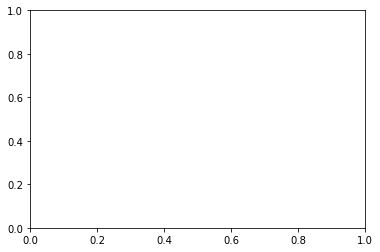

In [70]:
plt.hist(points_r1_2021)

In [62]:
allcourses_r1 = allcourses['points_r1_2021']

In [58]:
allcourses_r1

code
AL801    300
AL802    313
AL803    350
AL805    321
AL810    328
        ... 
SG441    NaN
SG446    NaN
TL803    NaN
TL812    NaN
WD148    NaN
Name: points_r1_2021, Length: 1652, dtype: object

TypeError: 'value' must be an instance of str or bytes, not a float

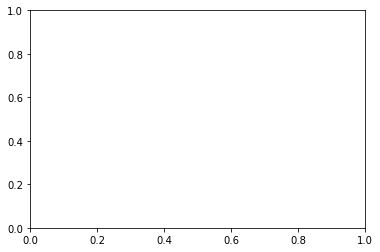

#### next steps - 

- clean up code and titles etc
- add 2019 data to allcourses dataframe - make note in notebook that 2019 Contains R1 and Mid points (not R2) so comparison not done
- do a dataframe for r2 points for all three years
- comparisons 

## My attempt - add 2019 data to all courses DF

# Learning

- manual importing
- not comparing like for like - EOS and Mid point data not correct for 2019
- not full understanding
- 
